## Portfolio Constuction

포트폴리오 구성(Portfolio Construction)은 위험을 줄이고 자산의 생존 가능성을 높이기 위해 자산을 분산하는 전략적 사고에서 출발한다. 이는 단일 자산에 의존하지 않고 다양한 자산에 나누어 투자함으로써 전체 포트폴리오의 안정성과 지속 가능성을 확보하려는 접근이다. 고대 상인들의 분산 투자 원칙처럼, 자산배분은 오랜 실천의 역사를 가지며 투자 활동의 철학적 기초로 자리잡아 왔다.

현대 금융에서는 이러한 자산배분을 보다 구조화하고 정량화하여 적용한다. 특히 ETF와 같은 섹터별 자산을 활용하면, 경제 전반의 다양한 영역에 걸쳐 자본을 배분할 수 있어 분산 효과를 높일 수 있다.

포트폴리오를 구성할 때는 섹터별 ETF에 어떤 가중치를 부여할지 결정해야 한다. 대표적인 방식으로는 Equal Weight, Price Weight, Market Cap Weight, Fundamental Weight, Alternative Weight 등이 있으며, 각 방식에 따라 포트폴리오의 성격과 성과가 달라진다. 이에 대한 자세한 설명은 아래 절에서 다룬다.

| 섹터                    | ETF명                                                | Yahoo Finance 티커 |
|-------------------------|------------------------------------------------------|---------------------|
| Communication Services  | Communication Services Select Sector SPDR Fund      | XLC                 |
| Consumer Discretionary  | Consumer Discretionary Select Sector SPDR Fund      | XLY                 |
| Consumer Staples        | Consumer Staples Select Sector SPDR Fund            | XLP                 |
| Energy                  | Energy Select Sector SPDR Fund                      | XLE                 |
| Financials              | Financial Select Sector SPDR Fund                   | XLF                 |
| Health Care             | Health Care Select Sector SPDR Fund                 | XLV                 |
| Industrials             | Industrial Select Sector SPDR Fund                  | XLI                 |
| Materials               | Materials Select Sector SPDR Fund                   | XLB                 |
| Real Estate             | Real Estate Select Sector SPDR Fund                 | XLRE                |
| Technology              | Technology Select Sector SPDR Fund                  | XLK                 |
| Utilities               | Utilities Select Sector SPDR Fund                   | XLU                 |


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
TICKERS = ['XLC','XLY','XLP','XLE','XLF','XLV','XLI','XLB','XLRE','XLK','XLU']

data = yf.download(
    tickers = TICKERS,
    start = '2015-01-01',
    interval = '1d',
    progress = False,
    multi_level_index = False,
    auto_adjust = False
)['Close']

In [4]:
ret = data.pct_change()

### 1. Equal Weighted Portfolio

Equal Weight 방식은 포트폴리오 내 모든 자산에 동일한 비중을 부여하는 가장 단순한 자산배분 방법이다. 섹터별 ETF를 활용할 경우, 각 섹터에 동일한 자본을 배분함으로써 특정 섹터에 대한 과도한 편향 없이 균형 잡힌 노출을 추구할 수 있다.

이 방식은 구조가 단순하고 실행이 용이하다는 장점이 있으며, 소외되기 쉬운 중소형 섹터에도 자연스럽게 투자하게 되는 효과가 있다. 다만 시장의 변화나 섹터 간 규모 차이를 반영하지 않기 때문에, 주기적인 리밸런싱이 필요하며 시가총액 중심의 시장 흐름과 괴리가 발생할 수 있다.

In [6]:
equal_weight = ret.mean(axis=1)
equal_weight.name = 'Equal Weight'

<Axes: xlabel='Date'>

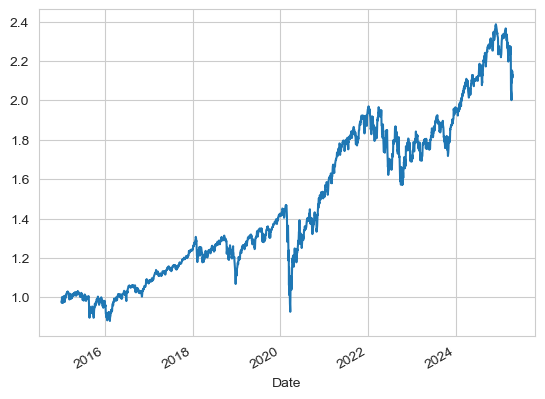

In [7]:
(1 + equal_weight).cumprod().plot()

### 2. Price Weighted Portfolio

Price Weight 방식은 각 자산의 가격에 비례하여 포트폴리오 내 비중을 결정하는 방식이다. 가격이 높은 자산일수록 더 큰 비중을 갖게 되며, 다우존스 산업평균지수(DJIA)가 대표적으로 이 방식을 따른다.

구현이 간단하고 계산이 직관적이라는 장점이 있으나, 자산의 내재가치나 시가총액과는 무관하게 가격 그 자체만으로 비중이 결정되기 때문에 왜곡된 투자 비중이 발생할 수 있다. 특히 가격이 높다는 이유만으로 실제 영향력이 크지 않은 자산이 과대 대표되는 문제가 발생할 수 있다.

### 3. Market Capital Weighted Portfolio

Market Capitalization Weight 방식은 각 자산의 시가총액에 비례하여 포트폴리오 내 비중을 결정하는 가장 널리 사용되는 자산배분 방식이다. S&P 500, MSCI World Index 등 주요 지수들이 이 방식을 따르며, 시장 전체의 자본 구조를 반영한 ‘시장 대표성’을 확보할 수 있다는 장점이 있다.

자동적으로 규모가 큰 섹터나 기업에 더 많은 자본이 배분되기 때문에 시장 흐름에 자연스럽게 순응하는 특성이 있으며, 리밸런싱 빈도가 낮고 운용 효율성도 높다. 그러나 대형주의 비중이 과도하게 높아지고, 과대평가된 자산에 자본이 집중되는 구조적 한계를 지닐 수 있다.

### 4. Fundamental Weighted Portfolio

Fundamental Weight 방식은 시가총액이나 가격이 아닌, 기업의 재무지표를 기반으로 자산의 비중을 결정하는 방식이다. 대표적인 기준으로는 매출, 순이익, 배당, 자산 등의 펀더멘털 지표가 사용되며, 경제적 실체에 기반한 자산배분을 목표로 한다.

이 방식은 시장에서 과대평가된 자산의 비중을 줄이고, 저평가된 자산의 비중을 높일 수 있는 구조를 가지며, 장기적으로 가치 중심의 투자성과를 추구할 수 있다는 장점이 있다. 반면 지표의 선택과 주기적 업데이트 과정에서 주관이 개입될 수 있으며, 시장 대표성과의 괴리가 발생할 수 있다는 한계를 가진다.

### 5. Alternative Weighted Portfolio

Alternative Weight 방식은 전통적인 가격, 시가총액, 재무지표 외의 대체 지표를 활용해 자산의 비중을 결정하는 방식이다. 대표적으로는 변동성, 유동성, ESG 점수, 거시경제 노출도, 머신러닝 기반 스코어 등이 사용된다.

이 방식은 특정 목적이나 투자 철학에 따라 포트폴리오를 맞춤형으로 설계할 수 있다는 장점이 있으며, 시장에서 간과되기 쉬운 요소들을 반영해 차별화된 성과를 추구할 수 있다. 그러나 지표의 선택과 가중치 산정 방식이 주관적일 수 있고, 데이터의 품질이나 해석에 따라 결과의 일관성이 떨어질 수 있다는 점은 유의해야 한다.